In [1]:
qimport numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns
#sns.set_style("darkgrid")
import sklearn

In [2]:
# choose between the normalized or standardized version of the data
air_data_all = pd.read_csv('data_4comp_std_labeled.csv', delimiter=',')

# select only the columns that pca will be used on
cols = ["PM2.5","PM10","NO2","O3"]   
air_data= air_data_all[cols]

#data converted to np array for easier indexing
air_data_np = np.array(air_data)

# colums with the ratings: categories 1,2,3,4
ratings = air_data_all['cat'] 
cat_labels = ["very low air quality", "low air quality", "medium air quality",  "good air quality"]

In [3]:
# calculation of svd
u, s, vh = np.linalg.svd(air_data, 
                         full_matrices=True) 
eigenval, eigenvec = s ** 2, vh

In [5]:
print(air_data_np[:,1])

[ 3.26084674  3.26925444  3.03383886 ... -0.59828718 -0.53943328
 -0.64873337]


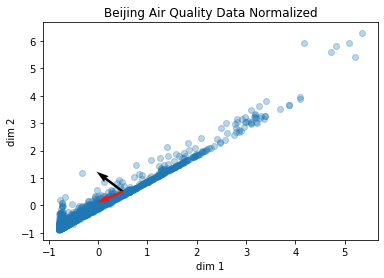

In [6]:
ax = sns.regplot(x=air_data_np[:,0],
            y= air_data_np[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3})

# Draw the Unit EigenVectors
plt.quiver(0.5, 0.5, vh[0,0],vh[3,0], scale_units='xy', angles='xy', scale=1, color = '#000000')
plt.quiver(0.5, 0.5, vh[0,1],vh[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
ax.set(xlabel='dim 1', 
       ylabel='dim 2',
       title='Beijing Air Quality Data Normalized');

In [7]:
## Calculate the coordinates of the data points in the projection axes of the space spanned 
## by the leading eigenvectors contained in $U$ 
u1 = u[:,0] * s[0] 
u2 = u[:,1] * s[1] 
u3 = u[:,2] * s[2]

<BarContainer object of 4 artists>

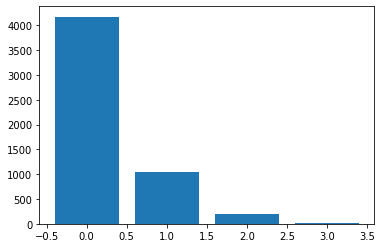

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# Sort eigenvectors (and -values) by descending order of eigenvalues.
sort = np.argsort(-eigenval)
eigenval = eigenval[sort]
eigenvec = eigenvec[:,sort]

# To get an idea of the eigenvalues we plot them.
figure = plt.figure('Eigenvalue comparison')
plt.bar(np.arange(len(eigenval)), eigenval)

In [9]:
project_data_featureloading = np.dot(air_data, vh.T) # Transpose feature loadings 'vh'
v_norm = np.dot(vh.T,vh)

In [10]:
Us_eig = np.dot(u[:,0:4], np.diag(s)) 

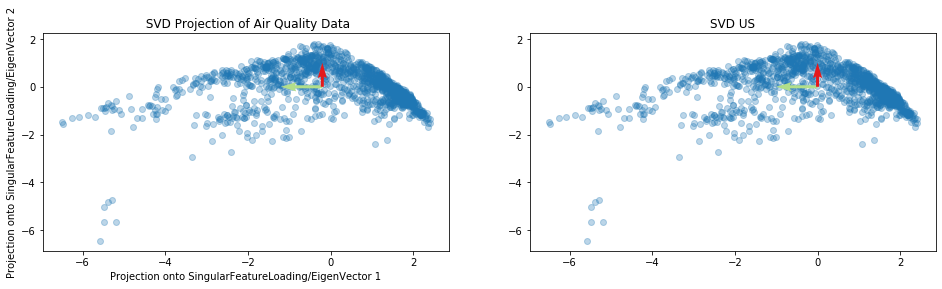

In [11]:
fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))

sns.regplot(x= project_data_featureloading[:,0],
            y= project_data_featureloading[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3},ax=ax1)
ax1.quiver(-0.2, 0, -v_norm[0,0], v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = '#b2df8a') # green arrow
ax1.quiver(-0.2, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c') #red arrow
ax1.set(xlabel='Projection onto SingularFeatureLoading/EigenVector 1', 
       ylabel='Projection onto SingularFeatureLoading/EigenVector 2',
       title=' SVD Projection of Air Quality Data');

sns.regplot(x=Us_eig[:,0],
            y=Us_eig[:,1],
            fit_reg=False,
            scatter_kws={'alpha':0.3},ax=ax2)
ax2.quiver(0, 0, -v_norm[0,0], v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = '#b2df8a')
ax2.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
ax2.set(xlabel='', 
       ylabel='',
       title='SVD US');

Anmerkung der Redaktion: 
- US steht für singular vectors (U) x singular value matrix (S) 
- $U$ contains $r$ **singular vectors** corresponding to the eigenvectors of $XX^\intercal$;
- $S$ is $N \times feature$ matrix with $r \times r$ diagonal submatrix of corresponding **singular values** sorted in the descending order.
- $XV= U S V^\intercal V= U S.$
- -> columns are uncorrelated

## Aber warum sind da auf dem letzten plot die Achsen so komisch? Und wo ist überhaupt der Unterschied zwischen dem linken und rechten plot? 

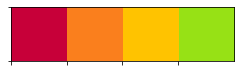

In [12]:
colors = [ "#c70039", "#fa7f1d", "#FFC300" , "#97e115"  ]
sns.set_palette(colors)
sns.palplot(sns.color_palette())

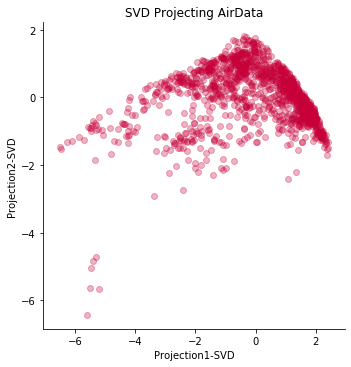

In [13]:
# set data to a Pandas Dataframa to ease plotting
names = ["U_"+str(x+1) for x in range(3)]
names.append('cat')
ds_us = pd.DataFrame(data= np.c_[u1, u2, u3, ratings], 
                     columns=names)

# 1st plot
ax = sns.lmplot('U_1', 
                'U_2', 
                data=ds_us, 
                palette=sns.color_palette("Blues"),
                fit_reg=False,
                scatter_kws={'alpha':0.3});
ax.set(xlabel='Projection1-SVD', 
           ylabel='Projection2-SVD',
           title='SVD Projecting AirData');



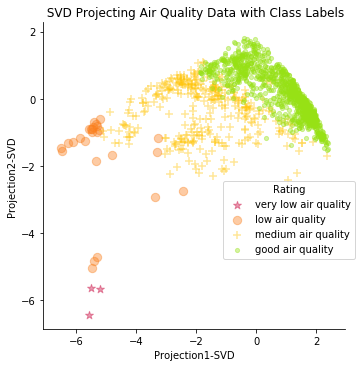

In [14]:
# 2nd plot
ax2 = sns.lmplot('U_1', 
               'U_2', 
               data=ds_us, 
               hue='cat', 
               markers=['*','o', '+','.'],
               palette=sns.color_palette(colors,4),
               fit_reg=False,
               scatter_kws={'alpha':0.4, "s": 70}, 
               legend_out=False);
ax2.set(xlabel='Projection1-SVD', 
       ylabel='Projection2-SVD',
       title=' SVD Projecting Air Quality Data with Class Labels');
plt.legend(bbox_to_anchor=(1.05, 0.5), title='Rating', labels = cat_labels);

In [15]:
# By SVD
projected_x= np.dot(air_data,vh.T)
v_norm= np.dot(vh.T, vh)

#print(projected_x.shape)
#print(labels.shape)
names = ["SVD-PC_"+str(x+1) for x in range(2)]
names.append('cat')
ds_svd = pd.DataFrame(data= np.c_[projected_x[:,0:2], air_data_all.cat], 
                      columns=names)
ds_svd['cat'] = ds_svd['cat'].astype(int)

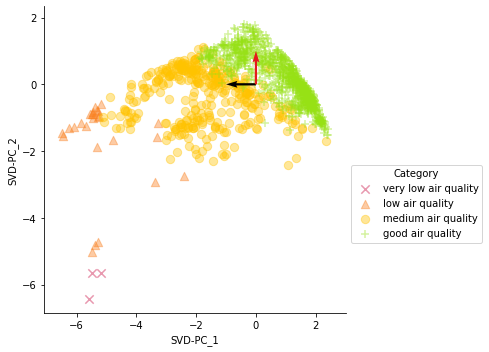

In [16]:
sns.lmplot('SVD-PC_1', 
           'SVD-PC_2', 
           data=ds_svd, 
           hue='cat', 
           markers=['x','^','o','+'],
           fit_reg=False,
           scatter_kws={'alpha':0.4, "s": 70}, 
           legend_out=False, height=5)
plt.quiver(0, 0, -v_norm[0,0],v_norm[1,0], scale_units='xy', angles='xy', scale=1, color = '#000000')
plt.quiver(0, 0, v_norm[0,1],v_norm[1,1], scale_units='xy', angles='xy', scale=1, color = '#e41a1c')
plt.legend(bbox_to_anchor=(1, 0.5), title='Category', labels = cat_labels);

In [17]:
cat4 = ds_us[ds_us["cat"] == 4]
cat3 = ds_us[ds_us["cat"] == 3]
cat2 = ds_us[ds_us["cat"] == 2]
cat1 = ds_us[ds_us["cat"] == 1]


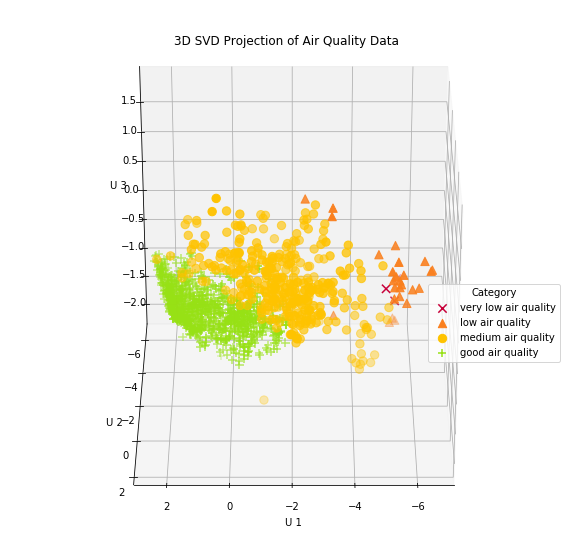

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cat1["U_1"], cat1["U_2"], cat1["U_3"], s=70, marker='x')
ax.scatter(cat2["U_1"], cat2["U_2"], cat2["U_3"], s=70, marker='^')
ax.scatter(cat3["U_1"], cat3["U_2"], cat3["U_3"], s=70, marker='o')
ax.scatter(cat4["U_1"], cat4["U_2"], cat4["U_3"], s=70, marker='+')

ax.set_xlabel('U 1')
ax.set_ylabel('U 2')
ax.set_zlabel('U 3')
ax.set_title('3D SVD Projection of Air Quality Data');
ax.view_init(30,90)
ax.legend(bbox_to_anchor=(1, 0.5), title='Category', labels = cat_labels);

## Quality of projection

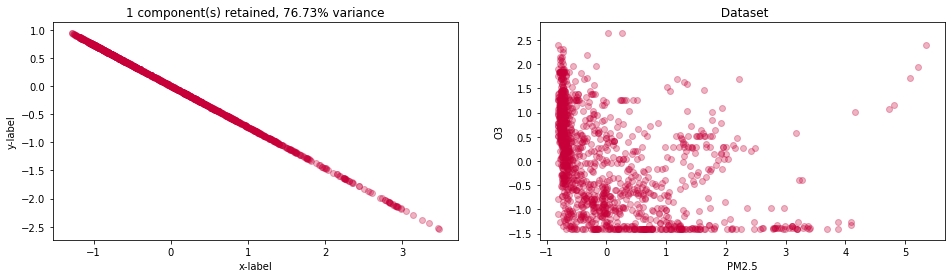

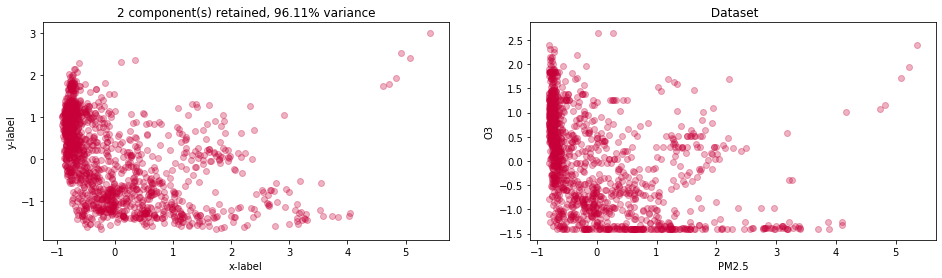

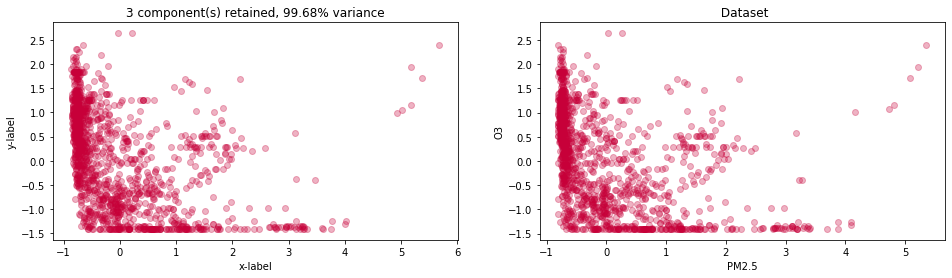

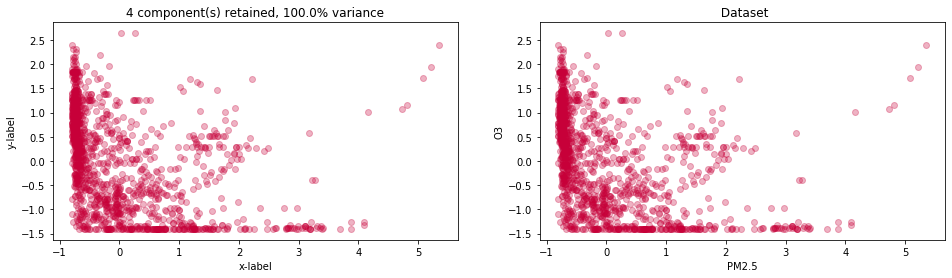

In [19]:
r = air_data.shape[1]
var_explained = np.cumsum(s**2)/np.sum(s**2)*100;

# You can change the features you would like to display, from 0 to 10
# ["PM2.5","PM10","NO2","O3"]

f1=0   #pm2.5
f2=3   #o3

approx = []
for n in range(1,r+1):
    approximation = np.dot((u[:,:n] * s[:n]),vh[:n,:]) 
    
    approx.append(approximation)
    
    fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(16,4))
    
    sns.regplot(x=approximation[:,f1],
                y=approximation[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax1)
    ax1.set(xlabel= 'x-label', 
           ylabel= 'y-label',
           title= (str(n) 
                   + ' component(s) retained, ' 
                   + str(round(var_explained[n-1],2)) 
                   + '% variance'))
    

    sns.regplot(x=np.array(air_data)[:,f1],
                y=np.array(air_data)[:,f2],
                fit_reg=False,
                scatter_kws={'alpha':0.3}, ax=ax2)
    ax2.set(xlabel='PM2.5', 
           ylabel= 'O3',
           title=' Dataset');

## Hidden factor model

In [20]:
# z: hidden factor 
# c : loading

z, mu, c = np.linalg.svd(air_data, full_matrices=True)
ds = np.sum(np.sum(air_data.T @ air_data))

print("z: ", z.shape)
print("mu: " , mu.shape)
print("ds: ", ds)

contributions = [mu[i]**2 / ds for i in range(len(mu))]
for i in range(len(mu)):
    print("component ", i, ": influence: ", np.round(contributions[i]*100 ,2), " %")


z:  (1361, 1361)
mu:  (4,)
ds:  8231.501000084849
component  0 : influence:  50.71  %
component  1 : influence:  12.81  %
component  2 : influence:  2.36  %
component  3 : influence:  0.21  %


In [21]:
# calculate new hidden factor and loading by multiplying it with the sqrt of the maximum singular value --> formula slides
mu_max = mu[0]
mu_sqrt = np.sqrt(mu[0])
z_new = np.expand_dims(z[:,0] * mu_sqrt, axis=1)
c_new = np.expand_dims(c[:,0] * mu_sqrt, axis=1)

In [22]:
# calcualte the model, derive the residuals as difference between model and obversed data
model = z_new @ c_new.T
residuals = air_data - model
residuals

,PM2.5,PM10,NO2,O3
0,0.872611,1.484798,0.284152,2.075603
1,0.871078,1.541300,0.132303,1.982931
2,0.807357,1.402117,0.137870,1.797505
3,0.694453,1.173470,0.166731,1.494332
4,0.712430,1.424790,0.419004,2.108692
...,...,...,...,...
1356,0.175018,-0.028203,-0.367936,0.239325
1357,0.008917,-0.084814,-0.211080,0.045088
1358,-0.253281,-0.289092,0.147189,-0.272526
1359,-0.519637,-0.449758,0.497580,-0.560772


##### try to make sense of this...

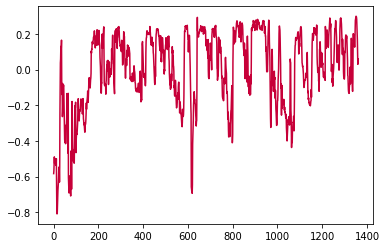

In [23]:
plt.plot(z_new)

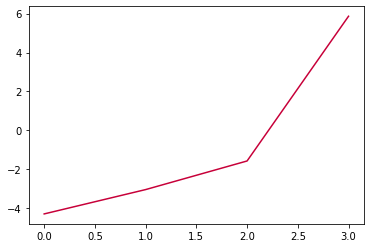

In [24]:
plt.plot(c_new)

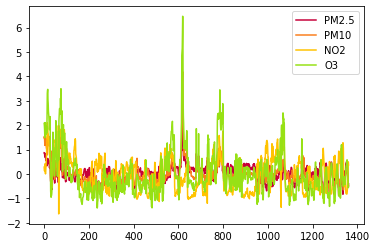

In [25]:
plt.plot(residuals)
plt.legend(cols)

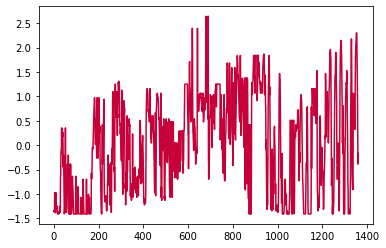

In [26]:
plt.plot(air_data["O3"])

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [28]:
%matplotlib inline

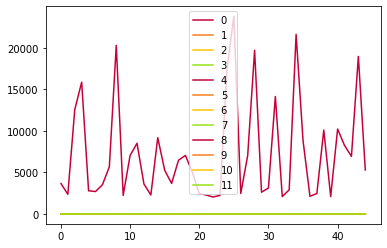

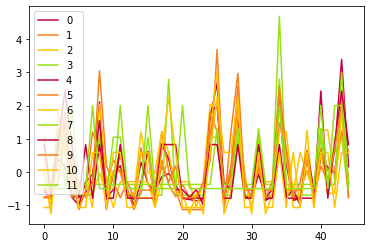

In [29]:
#validate best c on Slide 51

data = np.loadtxt('IAP_PAD2020/tons.dat')
data = pd.DataFrame(data)
data.plot()
plt.show
cols = list(data.columns)
zscore_data_pca = pd.DataFrame()
for col in cols:
        zscore_data_pca[col] = (data[col] - data[col].mean())/data[col].std(ddof=0)
zscore_data_pca.plot()

In [137]:
def center_(x, cluster):
    """ finds the centroid of a cluster
    X - the original data matrix
     cluster - the set with indices of the objects belonging to the cluster
    """
    #number of columns
    num_features = x.shape[1]
    centroidC = []
    
    for j in range(num_features):
        zz = x[:, j]
        zc = []
        for i in cluster:
            zc.append(zz[i])
        centroidC.append(np.mean(zc))
    return centroidC


def distNorm(x ,remains, ranges, p):
    """ Finds the normalized distances of data points in 'remains' to reference point 'p' 
     X - the original data matrix;
     remains- the set of X-row indices under consideration
     ranges- the vector with ranges of data features 
     p - the data point the distances relate to
     distan- the output column of distances from a to remains """

    #number of columns
    num_features = x.shape[1]
    rr = len(remains)
    z = x[remains, :]
    az = np.tile(np.array(p), (rr, 1))
    rz = np.tile(np.array(ranges), (rr, 1))
    dz = (z - az) / rz
    dz = np.array(dz)
    ddz = dz * dz
    if num_features > 1:
        di = sum(ddz.T)
    else:
        di = ddz.T
    distan = di
    return distan


def separCluster(x0, remains, ranges, a, b):
    """  Builds a cluster by splitting the points around refernce point 'a' from those around reference point b 
    x0 - data matrix
    remains- the set of X-row indices under consideration
    ranges- the vector with ranges of data features 
    a, b - the reference points
    cluster - set with row indices of the objects belonging to the cluster  
    """
    
    dista = distNorm(x0, remains, ranges, a)
    distb = distNorm(x0, remains, ranges, b)
    clus = np.where(dista < distb)[0]
    cluster = []
    for i in clus:
        cluster.append(remains[i])
    return cluster

def anomalousPattern(x, remains, ranges, centroid, me):
    """ Builds one anomalous cluster based on the algorithm 'Separate/Conquer' (Mirkin, 1999, Machine Learning Journal) 
        X - data matrix,
        remains - set of its row indices (objects) under consideration,
        ranges - normalizing values: the vector with ranges of data features  
        centroid - initial center of the anomalous cluster being build
        me - vector to shift the 0 (origin) to,
        output: cluster - set of row indices in the anomalous cluster, 
        centroid -center of the cluster    """
        
    key = 1
    while key == 1:
        cluster = separCluster(x, remains, ranges, centroid, me)
        if len(cluster) != 0:
            newcenter = center_(x, cluster)
        if  len([i for i, j in zip(centroid, newcenter) if i == j]) != len(centroid):
            centroid = newcenter
        else:
            key = 0
    return (cluster, centroid)

def dist(x, remains, ranges, p):
    """ Calculates the normalized distances of data points in 'remains' to reference point 'p'   
        X - data matrix,
        remains - set of its row indices (objects) under consideration,
        ranges - normalizing values: the vector with ranges of data features  
    
       distan - the calculated normalized distances
    """

    #number of columns
    num_features = x.shape[1]
    rr = len(remains)
    distan = np.zeros((rr,1))    
    for j in range(num_features):
        z = x[:, j]
        z = z.reshape((-1,1))
        zz = z[remains]
        y = zz - p[j]
        y = y / ranges[j]
        y = np.array(y)
        yy = y * y
        distan = distan + yy
    return distan


def zscore(df):
    '''
    Apply zscore to all columns of given frame
    '''
    for col in list(df.columns):
        df[col] = (df[col] - df[col].mean()) / df[col].std(ddof=0)
    return df

def init_data(which='allair'):
    '''
    initialise data from csv or older cells.
    '''
    if which=='town':
        df = pd.read_csv('tons.dat', delimiter='\t', names=range(12))
        return zscore(df)
    if which=='airpca':
        df = ds_us.iloc[:,:3]
        return df
    if which=='allair':
        df = pd.read_csv('data_selection.csv')
        return zscore(df).iloc[:,5:]
    
    if which=='iris':
        df = pd.read_csv('iris.dat', delimiter=' ')
        return zscore(df)


In [198]:
def anomalous_cluster(threshold, data='allair'):
    ##### ****** Main body for the Iterative Anomalous Cluster   *****
    #### You should test and Validate it with Market Towns Data set    
    # normalization FLAG
    normalization = 0
    # threshold value (this is an example)

    data_ap =  init_data(data)# pandas dataframe
    #data_ap =  zscore_data_pca.iloc[:,:-1]# pandas dataframe 
    x = data_ap.values.astype(np.float32)
    #y = data.target
    #number of data points
    nn = x.shape[0]
    #number of features
    num_features = x.shape[1]

    # grand means
    me = []
    # maximum value
    mmax = []
    # minimum value
    mmin = []
    # ranges
    ranges = []
    # data structure to keep everything together
    ancl = []


    for j in range(num_features): # for each feature
        # use each row of the feature
        row = x[:, j]
        # add the mean to list of means
        me.append(np.mean(row))
        #add max to list of maxs
        mmax.append(np.max(row))
        #add min to list of mins
        mmin.append(np.min(row))
        if normalization:
            ranges.append(1);
        else:
            ranges.append(mmax[j] - mmin[j])
        if ranges[j] == 0:
            print("Variable num {} is contant!".format(j))
            ranges[j] = 1

    sy = np.divide((x - me), ranges)
    #standard error
    sY = np.array(sy)
    # sum of standard deviation
    d = np.sum(sY * sY)   # total data scatter of normalized data


    # x, me range, d
    remains = list(range(nn))  # current index set of residual data after some anomalous clusters are extracted
    numberC = 0; # anomalous cluster counter
    while(len(remains) != 0):
        distance = dist(x, remains, ranges, me) # finding normalised distance vector from remains data points to reference 'me'
        ind = np.argmax(distance)
        index = remains[ind]
        centroid = x[index, :] # initial anomalous center reference point
        numberC = numberC + 1

        (cluster, centroid) = anomalousPattern(x, remains, ranges, centroid, me) # finding AP cluster


        censtand = np.divide((np.asarray(centroid) - me), np.asarray(ranges)) # standardised centroid   
        dD = np.sum(np.divide(censtand * censtand.T * len(cluster) * 100, d))   # cluster contribution, per cent 

        remains = np.setdiff1d(remains, cluster) 
        # update the data structure that keeps everything together
        ancl.append(cluster)   # set of data points in the cluster
        ancl.append(censtand)  # standardised centroid
        ancl.append(dD) # proportion of the data scatter

    ancl = np.asarray(ancl)
    ancl = ancl.reshape((numberC, 3))
    ##aK = numberC
    b = 3
    ll = [] # list of clusters

    for ik in range(numberC):
        ll.append(len(ancl[ik, 0]))
    rl = [i for i in ll if i >= threshold] # list of clusters with at least threshold elements
    cent = []
    if(len(rl) == 0):
        print('Too great a threhsold!!!!!!!!!!!!!!!!!!!')
    else:
        print('number of clusters: ', len(rl))
        num_cents = 0
        for ik in range(numberC):
            cluster = ancl[ik,0]
            if(len(cluster) >= threshold):
                cent.append(ancl[ik, 1])
                num_cents += 1

    cent = np.asarray(cent)
    cent = cent.reshape((len(cent), x.shape[1]))

    init_partition = np.zeros((x.shape[0], len(cent)))
    for index, d in enumerate(x):
        dists = [np.linalg.norm(d - c) for c in cent]
        assign = np.argmin(dists)
        init_partition[index, assign] = 1
    return init_partition, cent


**a)** 

- Study the fuzzy c-means (FCM) program in the software package of your choice.
- Apply the program to your dataset at the same c parameter with random seeds. Do this for several different values of parameter c= c_min, ..., c_max. Plot the FCM cost function versus c.

- Analyse the graphic and comment if any number of clusters better fits your data than the others.

**The plots don't get shown as they are saved in the notebook directory instead. This can be changed by replacing the savefig calls with plt.show()** 

/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if sys.path[0] == '':


[6902.291614251846, 6902.291515779316, 6902.291584295408]
[4532.0903799004045, 4532.090404179089, 4532.090357707346]
[3367.107749568624, 3367.1076027771537, 3367.107715024905]
[2684.2959920988587, 2684.295977044085, 2684.2956851430054]
[2224.522820089083, 2224.522639330595, 2224.522967884689]
[1887.98851575632, 1887.9885029818333, 1887.9884008341458]
[1641.933025222766, 1641.9075878132064, 1642.076990716802]
[1451.4216795972982, 1451.4211885063912, 1451.4217482868044]
[1299.9221123349034, 1299.9161674101906, 1299.9053856048517]


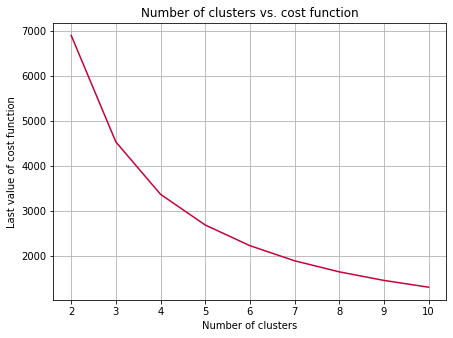

In [178]:
import skfuzzy as fuzz
colors_cluster = ['orange', 'm', 'k', 'Brown', 'c','g', 'y', 'ForestGreen']
colors_center = ['b','g', 'c', 'm', 'y', 'k']
shapes = ['s', 'x', '^', 'o', 's', 'p', 'v']
fig1, axes1 = plt.subplots(3,3, figsize=(10,10), subplot_kw=dict(projection='3d'))
# whole dataset for clustering
alldata = init_data()
# data result from PCA for visualization
visdata = init_data('airpca')

# vertically stack all of the data points in our set for the scikit library
alldata = np.vstack(alldata.iloc[:,n] for n in range(alldata.shape[1]))

# fuzzy partitioning coefficient list
fpcs = []
cluster_memberships = []
partitions = []
cost = [[] for center in range(9)]
all_centers = []

# iterate over axes in figure  to plot different amounts of clusters
for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    # cluster 3 times with random initialization and different seeds to ensure comparability between runs of the notebook
    centers, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, c=ncenters, m=2, error=0.005, maxiter=100, init=None, seed=1)
    cost[ncenters-2].append(jm[-1])

    centers, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, c=ncenters, m=2, error=0.005, maxiter=100, init=None, seed=42)
    cost[ncenters-2].append(jm[-1])

    centers, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, c=ncenters, m=2, error=0.005, maxiter=100, init=None, seed=1301)
    cost[ncenters-2].append(jm[-1])

    #store fpc values, partitions and centers for later
    fpcs.append(fpc)
    partitions.append(u)
    all_centers.append(centers)
    
    #plot assigned clusters, for each data point in set
    cluster_membership = np.argmax(u, axis=0)
    cluster_memberships.append(cluster_membership)
    for j in range(ncenters):
        ax.plot(visdata.iloc[:,0][cluster_membership==j],
                visdata.iloc[:,1][cluster_membership==j],
                visdata.iloc[:,2][cluster_membership==j],
               '.', color=colors_cluster[j%len(colors_cluster)])
        
    #mark center of each cluster
    i=0
    for pt in centers:
        ax.plot([pt[0]],pt[1],pt[2],
                'rs', mec='k')
        i += 1
    
    ax.set_title('Random initalization with\n{} clusters'.format(ncenters))

fig1.tight_layout()
fig1.savefig('random_clusters.png')

# print the last cost function value for each run.
for costs in cost:
    print(costs)

ax_cost = plt.subplot()
ax_cost.plot(range(2,9+2), np.array(cost)[:,0])
ax_cost.set_xlabel('Number of clusters')
ax_cost.set_ylabel('Last value of cost function')
ax_cost.set_title('Number of clusters vs. cost function')
fig1.tight_layout()
# default figsize
fig1.set_size_inches((6.4,4.8))
ax_cost.grid()
fig1.tight_layout()
fig1.savefig('cost_fcm.png')

## **b)**
- Study the Anomalous Pattern (AP) clustering algorithm. 
- Test the implementation with the benchmark data sets provided to you.

**For task b), we have done the same procedure for both of the sample datasets, to comment on the workings of the AP clustering algorithm.**

number of clusters:  3
Initial prototypes: 
 [[ 0.20974 -0.03042  0.28338  0.31062]
 [-0.23451  0.15507 -0.39162 -0.4002 ]
 [-0.0912  -0.24973  0.02054 -0.00849]]
(1361, 11)


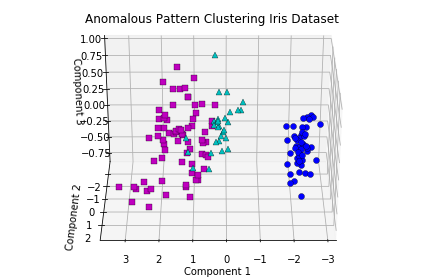

In [179]:
# Using PCA to get an easy 3D representation for the data sets
from sklearn.decomposition import PCA

# for the threshold, we chose to differ from what is given on the report to comment on the correct number of clusters - in the paper, we explain this in more detail.
init_part, cent = anomalous_cluster(19,'iris')

pca = PCA(n_components=3)
goal = pca.fit_transform(init_data('iris'))
fig, ax = plt.subplots(1,1, subplot_kw=dict(projection='3d'))

# determine which cluster each line belongs to
membership_iris = np.argmax(init_part, axis=1)
scatter_style = ['ms', 'bo', 'c^']
# plot a 
for ctr in range(3):
    ax.plot(goal[:,0][membership_iris==ctr],
            goal[:,1][membership_iris==ctr],
            goal[:,2][membership_iris==ctr],
            scatter_style[ctr], mec='k', mew=.3, )
ax.set_title('Anomalous Pattern Clustering Iris Dataset')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.view_init(30,90)
fig.tight_layout()
plt.savefig('iris_clustering.png')
print(init_data().shape)

number of clusters:  7
Initial prototypes: 
 [[ 0.51159  0.38356  0.56181  0.3625   0.38494  0.38452  0.29722  0.25926
   0.44306  0.4691   0.30278  0.175  ]
 [-0.09575 -0.0713  -0.13611  0.05     0.01871 -0.01429 -0.05397 -0.07407
   0.00556 -0.11944  0.01111  0.8    ]
 [-0.21847 -0.15463 -0.21944 -0.2     -0.16257 -0.18889 -0.16508 -0.07407
  -0.21667 -0.14722 -0.26667 -0.2    ]
 [ 0.27548  0.12315  0.15556  0.3      0.03626  0.08095  0.27937  0.25926
   0.25556 -0.01528  0.17778 -0.2    ]
 [-0.09211 -0.04352 -0.34444  0.3     -0.12164 -0.0619  -0.00635 -0.07407
   0.00556 -0.14028  0.17778 -0.2    ]
 [ 0.08334 -0.00185  0.40556 -0.2      0.03626  0.00952 -0.07778 -0.07407
  -0.24444  0.04722  0.17778 -0.2    ]
 [-0.10086 -0.16852 -0.09444 -0.2     -0.04269  0.00952 -0.14921 -0.07407
   0.25556 -0.07778  0.17778 -0.2    ]]
3.179317 2.443299 2.7512805
4.15492 3.4030788 2.9761856
2.3426454 2.4399946 3.2034256
3.2290976 3.8298771 4.3099685
3.3275886 3.0892003 3.0219693
3.991702 3.230813

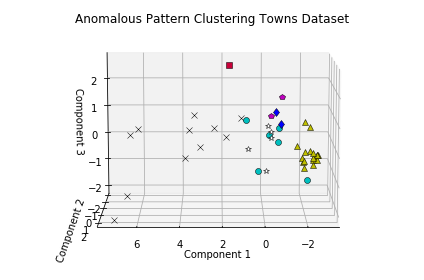

In [197]:
towns = init_data('town')
# for this dataset, we chose the same threshold as given in the report
init_part, cent = anomalous_cluster(2, 'town')
membership_towns = np.argmax(init_part, axis=1)
pca = PCA(n_components=3)
goal = pca.fit_transform(towns)
shapes = ['kx', 'co','y^','s','mp','w*','bd',]
fig, ax = plt.subplots(1,1, subplot_kw=dict(projection='3d'))
for ctr in range(7):
    ax.plot(goal[:,0][membership_towns==ctr],
            goal[:,1][membership_towns==ctr],
            goal[:,2][membership_towns==ctr], shapes[ctr], mec='k', mew=.5)
    
ax.set_title('Anomalous Pattern Clustering Towns Dataset')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.view_init(10,90)
fig.tight_layout()
#plt.savefig('towns_clustering.png')

## **c)** 
- Take the Anomalous Clustering as the initialization algorithm to the fuzzy c-means and apply the Anomalous Patterns_FCM (AP-FCM) to your data set.
- Discuss the options taken for setting the AP parameters. Present and visualize the found fuzzy partitions of AP-FCM.

**The clustering and plotting procedure is identical to task a). The only difference is that the AP clustering algorithm is used to initialize the fuzzy clustering process.** 

/home/oran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


number of clusters:  2
Initial prototypes: 
 [[ 0.22628  0.18649  0.09741  0.26485  0.26483 -0.20769 -0.03894 -0.08218
   0.21682 -0.00226 -0.10309]
 [-0.11094 -0.0913  -0.07455 -0.20622 -0.12821  0.24257  0.04641  0.0416
  -0.17907 -0.0034   0.12267]]


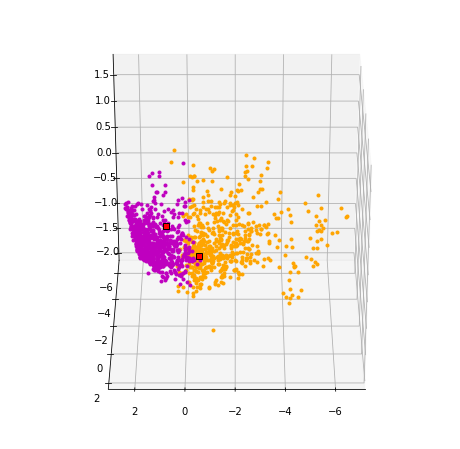

In [174]:
import skfuzzy as fuzz

colors_cluster = ['orange', 'm', 'k', 'Brown', 'c','g', 'y', 'ForestGreen']
colors_center = ['b','g', 'c', 'm', 'y', 'k']
shapes = ['s', 'x', '^', 'o', 's']

fig, ax = plt.subplots(1,1, figsize=(8,8), subplot_kw=dict(projection='3d'))

visdata = init_data('airpca')
alldata = init_data()
alldata = np.vstack(alldata.iloc[:,n] for n in range(alldata.shape[1]))

# The threshold of 300 cluster members was chosen to 
ac = anomalous_cluster(300)
init_partition = ac[0].T
centers, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data=alldata,c=len(centers), m=2, error=0.005, maxiter=100, init=init_partition)

# save relevant data for plotting later on
centers_ap = centers
fpc_ap = fpc
partition_ap = u
cluster_membership = np.argmax(u, axis=0)

#plot assigned clusters, for each data point in set
for j in range(len(centers)):
    ax.plot(visdata.iloc[:,0][cluster_membership==j],
            visdata.iloc[:,1][cluster_membership==j],
            visdata.iloc[:,2][cluster_membership==j],
           '.', color=colors_cluster[j])
#mark center of each cluster
i=0
for pt in centers:
    ax.plot([pt[0]],pt[1],pt[2],
            'rs', mec='k')
    i += 1

ax.view_init(30, 90)
fig.savefig('AP_2clusters.png')

**d)**
- Discuss the results obtained by Anomalous Patterns FCM for your data case respecting the following: 
    - (i) location of the initial prototypes
    - (ii) choice of the number of clusters.

**This task is fully realized in the paper.**

**e)**
- Apply, at least, two validation indices, like the *Adjust Rand Index (ARI)* and *Xie-Beni*, to access the quality of the fuzzy c-partitions obtained in **a)**. 
- Compare these results with the one of Anomalous Patterns FCM getting in **c)**.


**We chose to apply 2 internal indices, as our data is not labelled. This is explained more in-depth in the paper, together with the results and interpretation.**

Difference FPC AP, random: 4.034494810678524e-05
XBI Difference between AP and random: 0.0002939864162870287


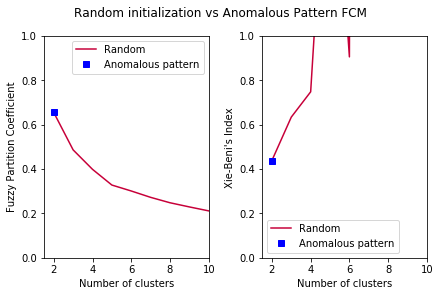

In [175]:
from scipy.spatial.distance import cdist

#simple implementation of xie_beni index, following the slides.
def xie_beni(data, partition, centers, m=2):
    n = data.shape[0]
    c = centers.shape[0]
    partition_m = partition**m
    d_sq = cdist(data, centers)**2
    centers_sq = cdist(centers, centers)**2
    centers_sq[centers_sq==0] = np.inf
    
    validity = np.sum(partition_m.T*d_sq) / (n * np.min(centers_sq))
    return validity

# plot the FPC, as calculated by the scikit fcm algorithm. includes value with AP clustering initialization.
fig, axs = plt.subplots(1,2, constrained_layout=True)
fig.suptitle('Random initialization vs Anomalous Pattern FCM')
axs[0].plot(range(2, len(fpcs)+2), fpcs, label='Random')
axs[0].plot(2,fpc_ap, 'bs', label='Anomalous pattern')
axs[0].set_ylim(0,1)
axs[0].set_xlim(1.5,10)
axs[0].set_xlabel('Number of clusters')
axs[0].set_ylabel('Fuzzy Partition Coefficient')
axs[0].legend()
print('Difference FPC AP, random: {}'.format(fpc_ap - fpcs[0]))
xbi_values = []
for c in range(0,len(fpcs)):
    xbi = xie_beni(init_data(), partitions[c], all_centers[c])
    xbi_values.append(xbi)   
xbi_ap = xie_beni(init_data(), partition_ap, centers_ap)

# plot Xie-Beni score for different number of clusters, including the AP value.
axs[1].plot(range(2, len(xbi_values)+2), xbi_values, label='Random')
axs[1].plot(2,xbi_ap, 'bs', label='Anomalous pattern')
axs[1].set_ylim(0,1)
axs[1].set_xlim(1.5,10)
axs[1].set_xlabel('Number of clusters')
axs[1].set_ylabel('Xie-Beni\'s Index')
axs[1].legend()
print('XBI Difference between AP and random: {}'.format(abs(xbi_ap-xbi_values[0])))
fig.savefig('validity_indices.png')

**f)**
- Make an interpretation of the found clusters by the AnomalousPatterns_FCM for your data as discussed in the classes.

**This task is completed in the paper.

### This is just legacy code from when I tried to implement the FCM algorithm by myself based on the slides. It may not be fully functional or complete. It wasn't used for any of the projects results.

In [38]:
# THIS IMPLEMENTATION WILL NOT BE USED FOR THE PROJECT
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
#Here comes the fuzzy clustering!#
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
# First of all, we need to define our constraints and such
def constraint_membership(arr):
    for row in range(arr.shape[0]):
        if np.allclose(arr[row,:],np.ones_like(arr[row,:])):
            return False
    return True

# Matrix X (the fuzzy c-partition) consists of each data point in a cluster
# and their membership value which is contained in [0,1]
# which means we have a cxn matrix of k-tuples
# where k is the number of attributes our dataset has
# (I THINK)
def fuzzy_c_means(x, centers):
    # Secondly, we will define the parameters
    # number of clusters (renamed from sample code)
    num_clusters = num_cents
    # weighting exponent (Degree of fuzzification) m >=1.0 where 1.0 means crisp
    m = 2.0
    # maximum number of iterations T, arbitrarily capped at 100
    T = 100
    #Termination measure? E_t = norm(V_t -V_(t-1)) --> implemented as epsilon=.001
    #!!! V_t is a set of vectors of prototypes or centroids after t iterations

    # change in cluster centers compared to last 
    change_centers = np.linalg.norm(centers)

    # epsilon as termination factor as suggested in slides
    epsilon = 0.005
    # current iteration
    iteration = 0
    axs = []
    while iteration <= T and change_centers > epsilon:
        old_centers = np.copy(centers)
        iteration += 1
        #print('*****\nStarting iteration no. {}\n*****'.format(iteration))

        # Calculate U_t - formula:
        #
        # (1 /  D_(ik)) ** (2/(m-1)) 
        # / sum_(j=1->c)(1/D_(jk)) ** 2/(m-1)
        #
        # D_(ik) = sqrt(norm(x_k - v_i))
        # check if this works! may have broadcasting errors
        distances = np.array(np.zeros((x.shape[0],centers.shape[0])))
        # calculate a new row in the distance matrix for each data point
        for center in range(centers.shape[0]):
            for row in range(x.shape[0]):
                distances_pt_to_ctrs = np.sqrt(np.linalg.norm(x[row,:] - centers[center,:]))
                distances[row, center] = distances_pt_to_ctrs


        # U_t is the membership matrix
        membership = np.zeros_like(distances)
        # Here's the plan
        # we calculate the membership function row-wise, that is
        # the sum of 
        for row in range(x.shape[0]):
            distance_to_clusters = (1/distances[row,:]) ** (2/(m-1))
            sum_distances_to_clusters = np.sum(distance_to_clusters)
            membership_row = distance_to_clusters / sum_distances_to_clusters
            membership[row,:] = membership_row
        assert constraint_membership(membership)
        # establish new centers
        for center in range(centers.shape[0]):
            # membership[:,center] is a column containing the membership of each data point to that center
            factors = np.asarray(membership[:,center] ** m)
            factors_broadcast = np.asarray([factors for i in range(x.shape[1])])

            # we have to transpose for the element wise multiplication of two nxm matrices
            # axis = 0 to keep the dimensions
            centers[center,:] = np.sum(factors_broadcast.T * x, axis=0)\
                                / np.atleast_2d(np.sum(factors)).T
        change_centers = np.linalg.norm(centers - old_centers)
    return centers, membership, distances

In [182]:
# THIS IMPLEMENTATION WILL NOT BE USED FOR THE PROJECT

# now the same with my own c means implementation
#colors = ['b', 'orange', 'g', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']
# whatever may this number mean?
#np.random.seed(28980)
#fig1, axes1 = plt.subplots(2,2, figsize=(8,8))
#alldata = pd.DataFrame(x)
#fpcs = []
#np.random.seed(28980)
#for ncenters, ax in enumerate(axes1.reshape(-1), 2):
#    centers = np.random.rand(ncenters, alldata.shape[1])
#    print(ncenters)
#    centers, membership, distances = fuzzy_c_means(x, centers)
#    
#    #store fpc values for later
#    fpcs.append(fpc)
#    
#    #plot assigned clusters, for each data point in set
#    cluster_membership = np.argmax(membership, axis=1)
#    for j in range(len(centers)):
#        print(j)
#        ax.plot(alldata[cluster_membership == j].iloc[:,0],
#               alldata[cluster_membership == j].iloc[:,1],
#               '.', color=colors[j])
#    
#    #mark center of each cluster
#    for pt in centers:
#        ax.plot(pt[0], pt[1], 'rs')
#        
#    ax.set_title(' i did a {} cluster'.format(ncenters))
#    ax.axis('off')
#    
#fig1.tight_layout()
#print(fpcs)
